In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

In [3]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

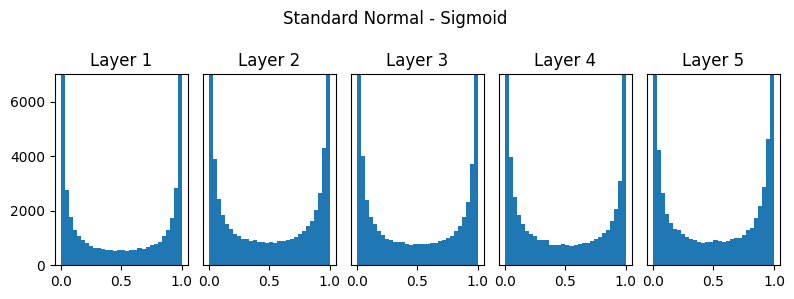

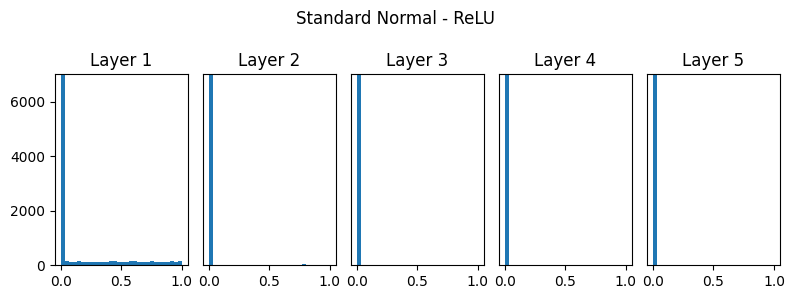

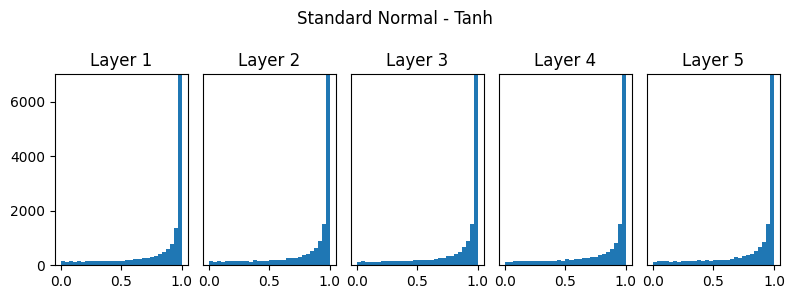

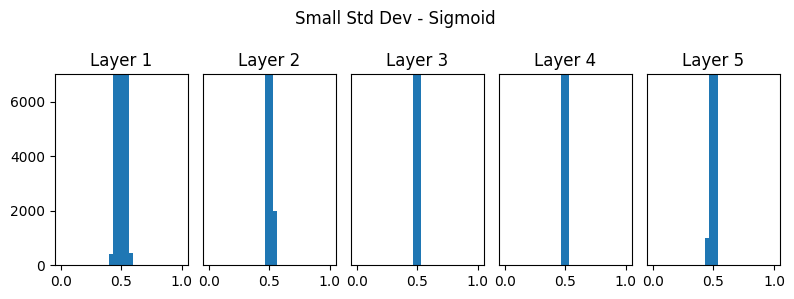

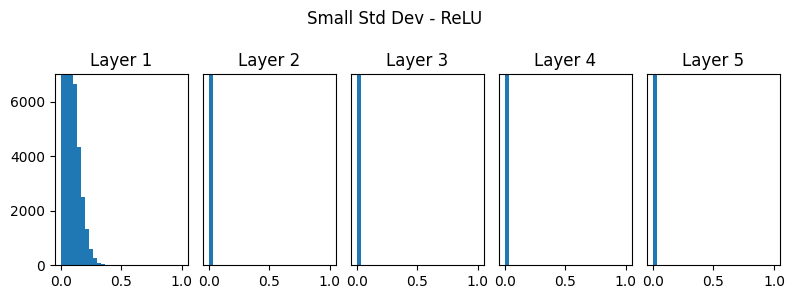

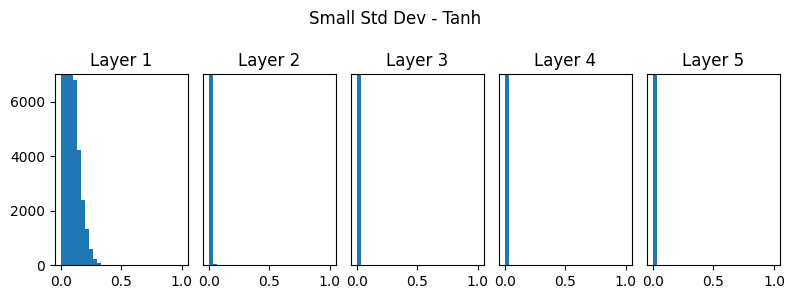

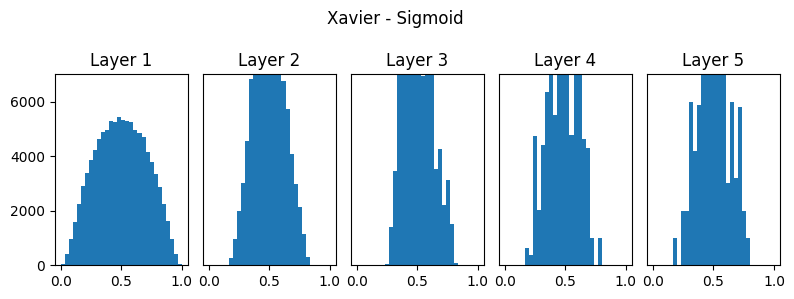

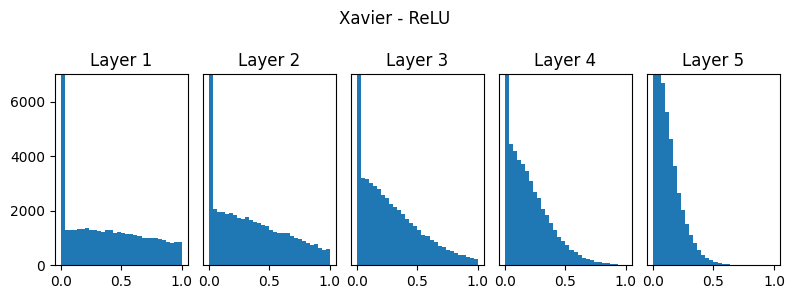

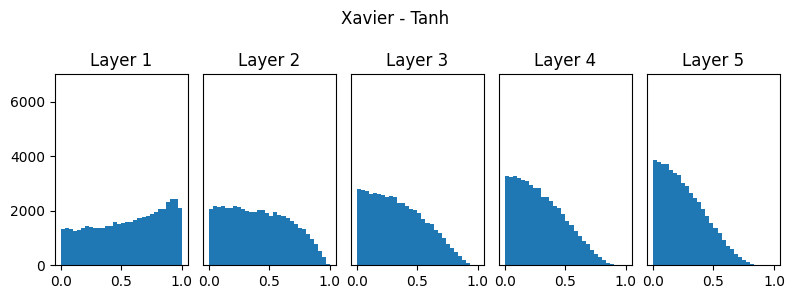

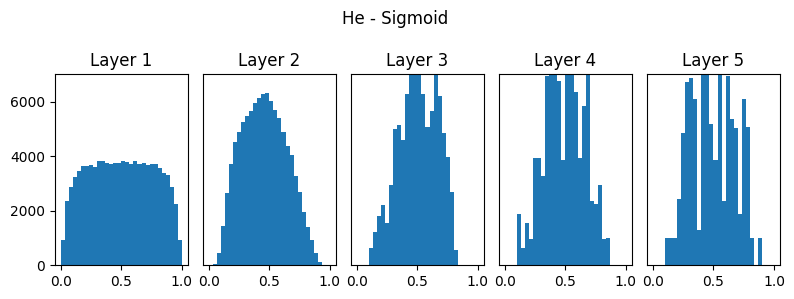

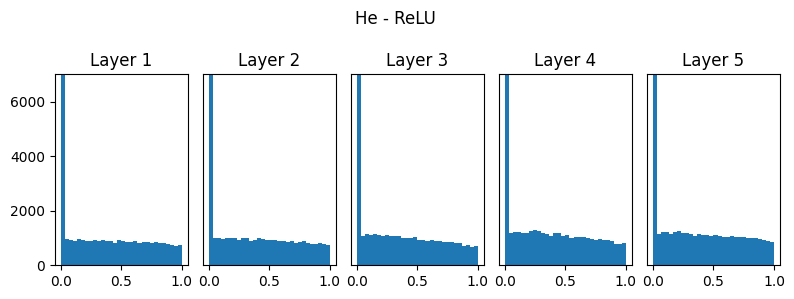

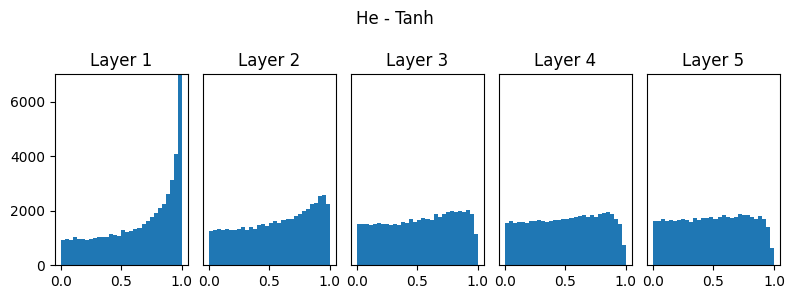

In [4]:

# 설정
node_num = 100  # 각 층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층의 수
sample_size = 1000  # 입력 데이터 크기

# 입력 데이터 준비
x = np.random.randn(sample_size, node_num)

# 가중치 초기화 방식 리스트
weight_initializations = {
    "Standard Normal": lambda: np.random.randn(node_num, node_num) * 1,
    "Small Std Dev": lambda: np.random.randn(node_num, node_num) * 0.01,
    "Xavier": lambda: np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num),
    "He": lambda: np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num),
}

# 활성화 함수 리스트
activation_functions = {
    "Sigmoid": sigmoid,
    "ReLU": ReLU,
    "Tanh": tanh,
}

# 결과 시각화
for w_idx, (w_name, w_init) in enumerate(weight_initializations.items()):
    for z_idx, (z_name, activation) in enumerate(activation_functions.items()):
        activations = {}
        x_current = x

        # 각 층에 대해 순전파
        for i in range(hidden_layer_size):
            w = w_init()
            a = np.dot(x_current, w)
            x_current = activation(a)
            activations[i] = x_current

        # 플롯 생성
        plt.figure(figsize=(8, 3))
        for i, act in activations.items():
            plt.subplot(1, hidden_layer_size, i + 1)
            plt.hist(act.flatten(), 30, range=(0, 1))
            plt.title(f"Layer {i+1}")
            if i != 0:
                plt.yticks([])
            plt.ylim(0,7000)
        plt.suptitle(f"{w_name} - {z_name}")
        plt.tight_layout()
        plt.show()
